## Assignment 1

## ML1 LAB01 16.04.2022

## Shrimanta Satpati 21bda45

### Question-1) Write a program that uses an if-else ladder.

In [2]:
#In this program, we input a number check if the number is positive or negative or zero

num = float(input("Enter a number: "))
if num >= 0:
    if num == 0:
        print(f"{num} is Zero")
    else:
        print(f" {num} is a Positive number")
elif num < 0:
    print(f" {num} is a Negative number")
else:
    print(f" {num} is not a number")

Enter a number: 5
 5.0 is a Positive number


### Question-2) Write 5 different functions and call them in one program.

In [7]:
class test:
    def __init__(self,raw_data):
        self.method1 = raw_data*10
        self.compute_method_2(raw_data)
        self.compute_method_3(raw_data)
        self.compute_method_4(raw_data)
        self.compute_method_5(raw_data)
    
    def compute_method_2(self,raw_data):    
        self.method2 = raw_data+20
        
    def compute_method_3(self,raw_data):    
        self.method3 = raw_data-30
        
    def compute_method_4(self,raw_data):
        self.method4 = raw_data/10
        
    def compute_method_5(self,raw_data):
        self.method5 = raw_data%10
# a quick test using "raw_data = 1"
output = test(50)

# run other computations
output.compute_method_2(50)
output.compute_method_3(50)
output.compute_method_4(50)
output.compute_method_2(50)

# now all the values are available
print("The multiplied value is:", output.method1)
print("The added value is:", output.method2) 
print("The subtracted value is:", output.method3)
print("The divided value is:", output.method4)
print("The remainder value is:", output.method5)

The multiplied value is: 500
The added value is: 70
The subtracted value is: 20
The divided value is: 5.0
The remainder value is: 0


### Question-3) Read any dataset from https://archive.ics.uci.edu/ml/index.phpand perform a missing value treatment, check for distribution of each variable, find the correlation matrix and write conclusions from the matrix.

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv("C:/Users/super/Downloads/heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.shape

(303, 14)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Check data type

In [14]:
# to know the type of variable
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [15]:
# change the categorical type to categorical variables
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [16]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=object)

In [17]:
# to count the number in of each category decending order
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [18]:
# to check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
# change the labelling for better interpretation/ visualization understanding
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['slope'] = df.cp.replace({1: "upsloping", 
                          2: "flat", 
                          3:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [20]:
# to know the basic stats
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


## exploratory data analysis on Heart Disease Dataset

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Disease       165
No_disease    138
Name: target, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

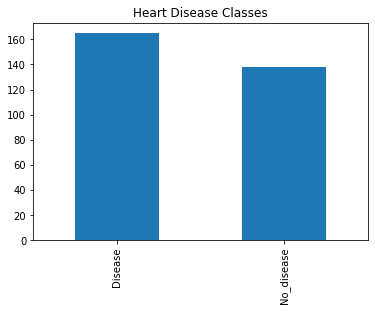

In [22]:
print(df.target.value_counts())
df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

Text(0.5, 1.0, 'Age Distribution')

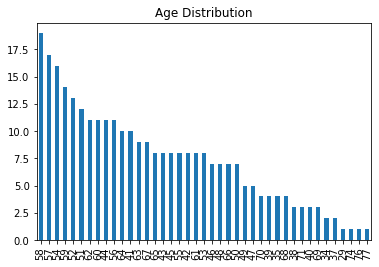

In [23]:
# print(df.age.value_counts())
df['age'].value_counts().plot(kind='bar').set_title('Age Distribution')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

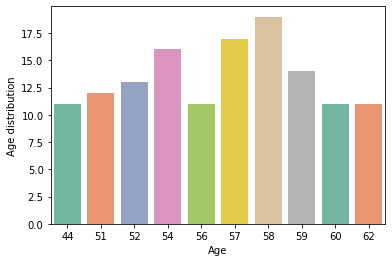

In [24]:
# Analyze distribution in age in range 10
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
            y=df.age.value_counts()[:10].values,
            palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

<AxesSubplot:>

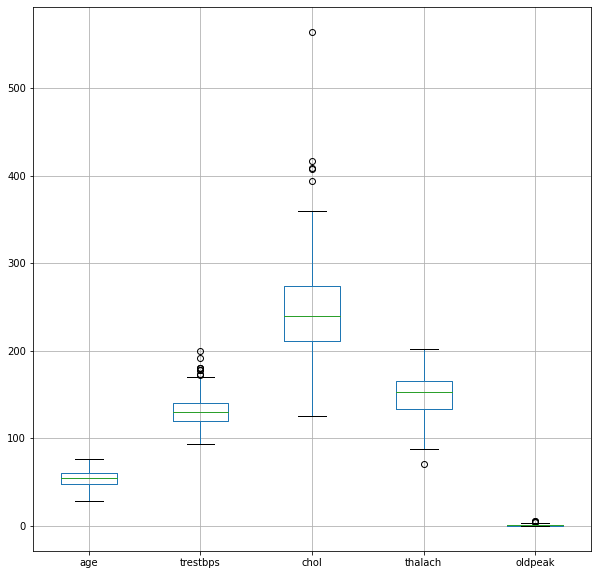

In [28]:
df.boxplot(figsize=(10,10))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>, <AxesSubplot:>]],
      dtype=object)

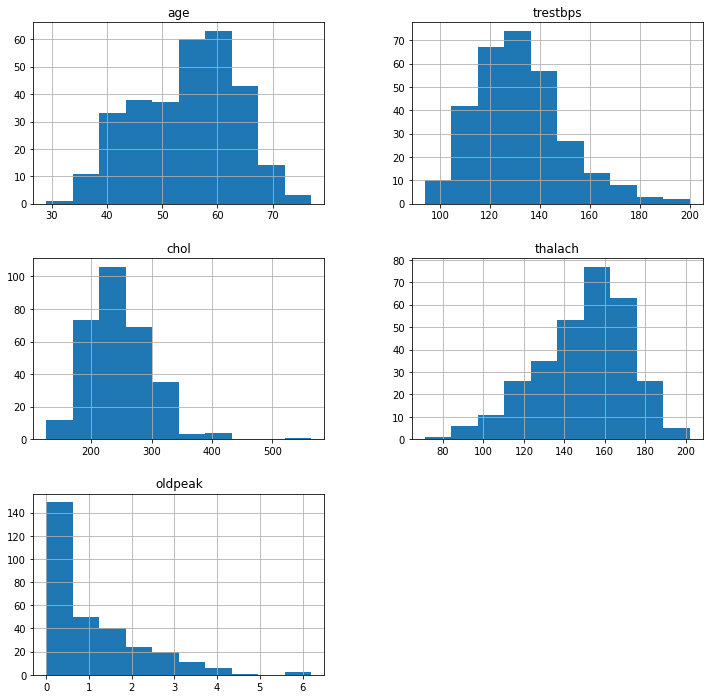

In [29]:
df.hist(figsize=(12,12))

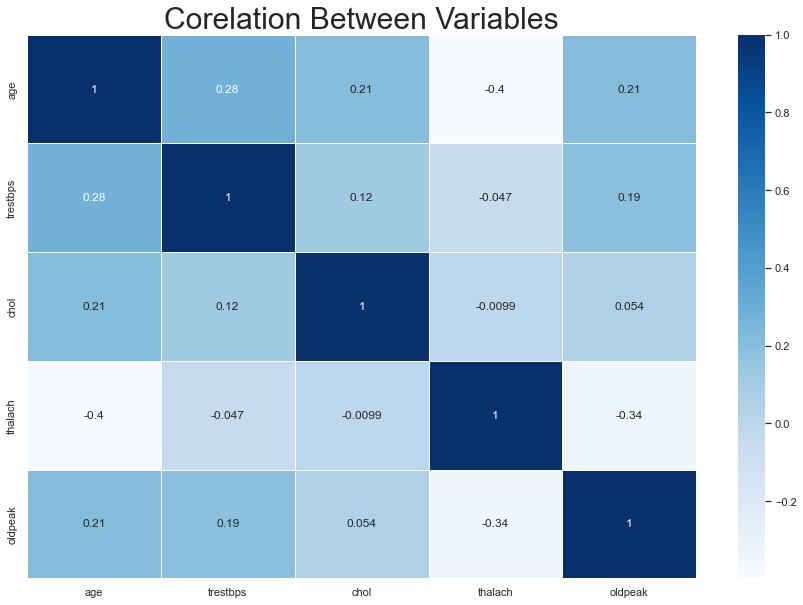

In [30]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

### ‘cp’, ‘thalach’, ‘slope’ shows good positive correlation with target.
### ‘oldpeak’, ‘exang’, ‘ca’, ‘thal’, ‘sex’, ‘age’ shows a good negative correlation with target.
### ‘fbs’ ‘chol’, ‘trestbps’, ‘restecg’ has low correlation with our target.

### Question-4) Read a dataset and perform slice it in different ways (Hint: https://pandas.pydata.org/docs/user_guide/indexing.html).

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


In [31]:
df[0:3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease


In [32]:
df[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


In [34]:
df[::-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
302,57,Female,typical_angina,130,236,0,0,174,No,0.0,typical_angina,1,reversable_defect,No_disease
301,57,Male,0,130,131,0,1,115,Yes,1.2,0,1,normal,No_disease
300,68,Male,0,144,193,1,1,141,No,3.4,0,2,normal,No_disease
299,45,Male,non-anginal pain,110,264,0,1,132,No,1.2,non-anginal pain,0,normal,No_disease
298,57,Female,0,140,241,0,1,123,Yes,0.2,0,0,normal,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease


In [36]:
df.loc[:3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease


In [37]:
df.loc[4]

age                        57
sex                    Female
cp                          0
trestbps                  120
chol                      354
fbs                         0
restecg                     1
thalach                   163
exang                     Yes
oldpeak                   0.6
slope                       0
ca                          0
thal        reversable_defect
target                Disease
Name: 4, dtype: object

In [38]:
df.loc[[1,4,6]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease
6,56,Female,typical_angina,140,294,0,0,153,No,1.3,typical_angina,0,reversable_defect,Disease


In [39]:
df.loc[[1,4,6],['cp','ca','thal']]

,cp,ca,thal
1,atypical_angina,0,reversable_defect
4,0,0,reversable_defect
6,typical_angina,0,reversable_defect


In [40]:
df.iloc[:,1:5]

,sex,cp,trestbps,chol
0,Male,non-anginal pain,145,233
1,Male,atypical_angina,130,250
2,Female,typical_angina,130,204
3,Male,typical_angina,120,236
4,Female,0,120,354
...,...,...,...,...
298,Female,0,140,241
299,Male,non-anginal pain,110,264
300,Male,0,144,193
301,Male,0,130,131


### Question-5) Can we find correlation between two categorical variables? How?
### There are three metrics that are commonly used to calculate the correlation between categorical variables:
### 1. Tetrachoric Correlation: Used to calculate the correlation between binary categorical variables.
### 2. Polychoric Correlation: Used to calculate the correlation between ordinal categorical variables.
### 3. Cramer’s V: Used to calculate the correlation between nominal categorical variables.